## Question 1

In [1]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy import signal
from scipy import signal,fftpack
from scipy.fftpack import fft

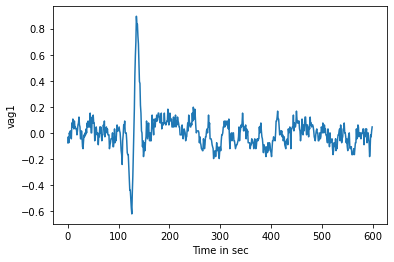

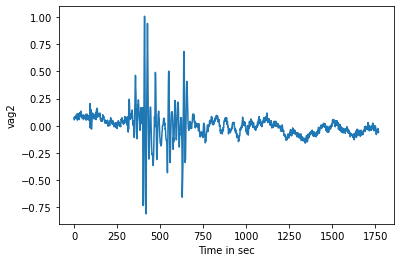

In [2]:

# Read data file
Fs1 = 2000.0      # sampling frequency 

x1=np.genfromtxt("vag1.dat.txt") #loading data
x1= x1- np.mean(x1)


plt.plot(x1)  #plotting signal
plt.ylabel('vag1')
plt.xlabel('Time in sec') 
plt.show()


x2=np.genfromtxt("vag2.dat.txt") #loading data
x2= x2- np.mean(x2)


plt.plot(x2)  #plotting signal
plt.ylabel('vag2')
plt.xlabel('Time in sec') 
plt.show()


C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


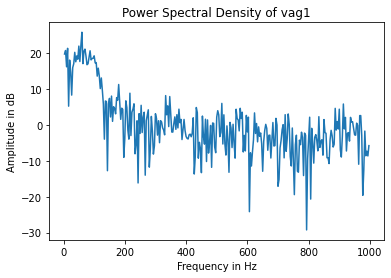

In [3]:
# psd

fs=2000
F1= fftpack.fft(x1)
freqs= fftpack.fftfreq(len(x1))
freqs= freqs*fs
mask= freqs>0 #ignore negative frequencies 
PSD1= (F1)*(F1)
PSD1= (10*np.log10(PSD1))
plt.plot(freqs[mask], PSD1[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density of vag1')
plt.show()

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


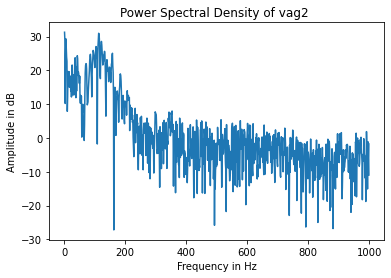

In [4]:
# psd

fs=2000
F2= fftpack.fft(x2)
freqs= fftpack.fftfreq(len(x2))
freqs= freqs*fs
mask= freqs>0 #ignore negative frequencies 
PSD2= (F2)*(F2)
PSD2= (10*np.log10(PSD2))
plt.plot(freqs[mask], PSD2[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density of vag2 ')
plt.show()

In [5]:
#Energy computation
E1=0
for i in range (0,len(PSD1)):
    E1= E1+abs(i)*abs(i) 
E1    

71820100

In [6]:
E2=0
for i in range (0,len(PSD2)):
    E2= E2+abs(i)*abs(i) 
E2  

1846844845

In [7]:
#Mean frequency computation
mean1=0
L_half= (int)((len(PSD1))/2)
for i in range (0,L_half):
    mean1= mean1 + i*PSD1[i]

mean1= ((2*mean1)/(len(PSD1)*E1))*fs  
mean1

(-0.013258214593355602+0.0011903288659067162j)

In [8]:
var1=0
for i in range (0,L_half):
    var1= var1+ (i-mean1)*(i-mean1)*PSD1[i]
var1= ((2*var1)/(E1*len(PSD1)))*fs
var1

(-3.274882470416152+0.13288182111047628j)

In [9]:
#Mean frequency computation
mean2=0
L_half= (int)((len(PSD2))/2)
for i in range (0,L_half):
    mean2= mean2 + i*PSD2[i]

mean2= ((2*mean2)/(len(PSD2)*E2))*fs  
mean2

(-0.00195711574979964+3.267753734536043e-05j)

In [10]:
var2=0
for i in range (0,L_half):
    var2= var2+ (i-mean2)*(i-mean2)*PSD2[i]
var2= ((2*var2)/(E2*len(PSD2)))*fs
var2

(-1.5472873335812958+0.020091596632319405j)

## Question 2

In [11]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy import signal
from scipy import signal,fftpack
from scipy.fftpack import fft

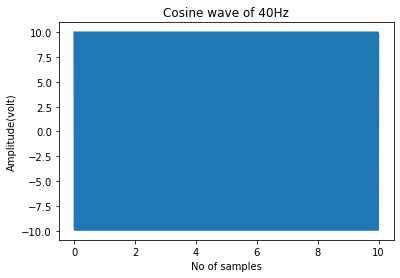

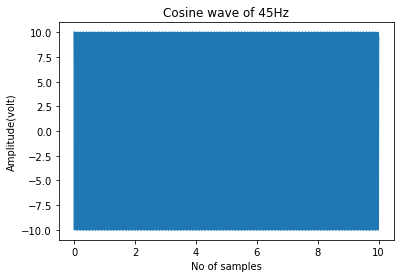

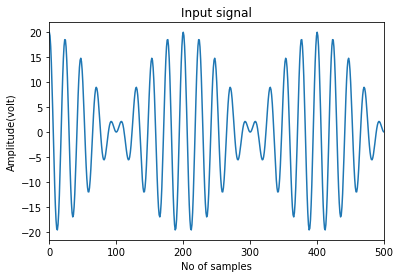

In [12]:
fm= 40
fs= 1000
x1 = np.arange(0,10,1/fs);
y1 = 10*np.cos(2*np.pi*fm*x1);
plt.plot(x1,y1)
plt.xlabel('No of samples')
plt.ylabel('Amplitude(volt)')
plt.title('Cosine wave of 40Hz')
plt.show()

fm= 45
fs= 1000
x2 = np.arange(0,10,1/fs);
y2 = 10*np.cos(2*np.pi*fm*x2);
plt.plot(x2,y2)
plt.xlabel('No of samples')
plt.ylabel('Amplitude(volt)')
plt.title('Cosine wave of 45Hz')
plt.show()

#Sum of two sinusoidal waves
sgnl= y1 + y2
plt.xlabel('No of samples')
plt.ylabel('Amplitude(volt)')
plt.title('Input signal')
plt.plot(sgnl)
plt.xlim(0,500)
plt.show()

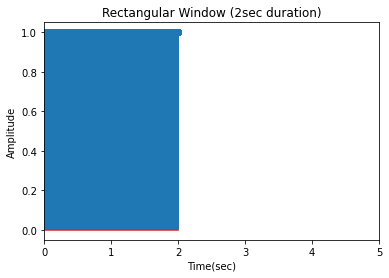

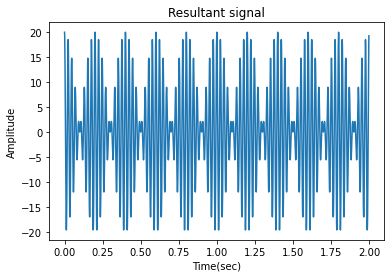

In [13]:
M1 = np.arange(0,2,1/fs) #for 2second window duration
win1 = np.zeros(len(M1))
for i in range(0,len(M1)):
    win1[i]=1
    
plt.stem(M1,win1)
plt.title('Rectangular Window (2sec duration)')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.xlim(0,5)
plt.show()

#Multiplication of input signal with rectangular window
Z1= np.zeros(len(win1))
for i in range(0,len(win1)):
    Z1[i] = win1[i]*sgnl[i]
ind = np.arange(Z1.size) 
t=ind*(1/fs)
plt.plot(t,Z1)
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Resultant signal')
plt.show()

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


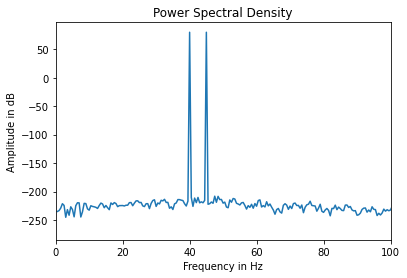

In [14]:

#PSD for when the signal multiplied with 2sec duration rectangular window
F1= fftpack.fft(Z1)
freqs= fftpack.fftfreq(len(Z1))
freqs= freqs*fs
mask= freqs>0 #ignore negative frequencies 
PSD1= (F1)*(F1)
PSD1= (10*np.log10(PSD1))
plt.plot(freqs[mask], PSD1[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density')
plt.xlim(0,100)
plt.show()

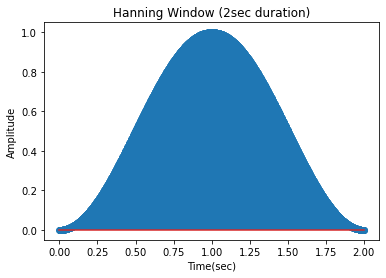

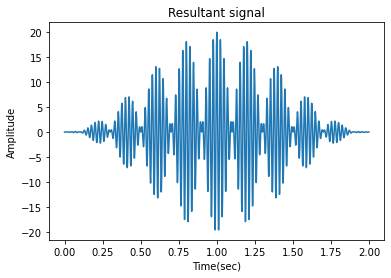

In [15]:
M1 = 2*fs
M1_half= (int)(M1/2)
Han1 = np.zeros(M1)
for i in range(0,M1):
    Han1[i] = 0.5 + 0.5*np.cos(np.pi*(i+M1_half)/M1_half)
    
n = np.arange(0,M1)
plt.stem(n/fs,Han1)
plt.title('Hanning Window (2sec duration)')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

#Multiplication of input signal with Hanning window of 2sec duration
Z1= np.zeros(len(Han1))
for i in range(0,len(Han1)):
    Z1[i] = Han1[i]*sgnl[i]
ind = np.arange(Z1.size) #index initialization
t=ind*(1/fs) #Convert no of samples into time
plt.plot(t,Z1)
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Resultant signal')
plt.show()

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


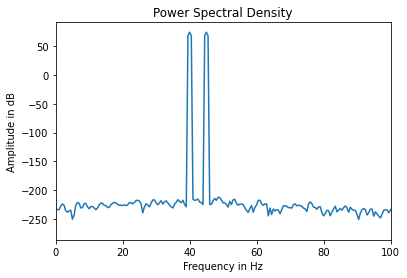

In [16]:
#PSD for when the signal multiplied with 2sec duration hanning window
F1= fftpack.fft(Z1)
freqs= fftpack.fftfreq(len(Z1))
freqs= freqs*fs
mask= freqs>0 
PSD1= (F1)*(F1)
PSD1= (10*np.log10(PSD1))
plt.plot(freqs[mask], PSD1[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density')
plt.xlim(0,100)
plt.show()

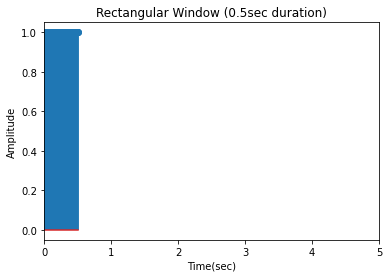

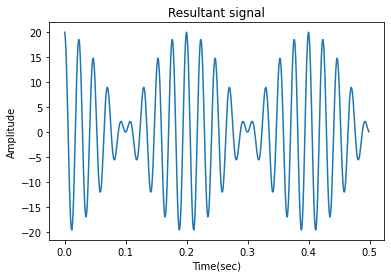

In [17]:
M1 = np.arange(0,0.5,1/fs) #for 0.5second window duration
win1 = np.zeros(len(M1))
for i in range(0,len(M1)):
    win1[i]=1
    
plt.stem(M1,win1)
plt.title('Rectangular Window (0.5sec duration)')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.xlim(0,5)
plt.show()

#Multiplication of input signal with rectangular window
Z1= np.zeros(len(win1))
for i in range(0,len(win1)):
    Z1[i] = win1[i]*sgnl[i]
ind = np.arange(Z1.size) 
t=ind*(1/fs)
plt.plot(t,Z1)
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Resultant signal')
plt.show()

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


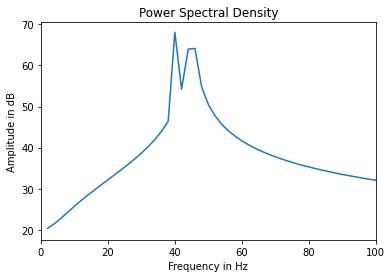

In [18]:

#PSD for when the signal multiplied with 0.5sec duration rectangular window
F1= fftpack.fft(Z1)
freqs= fftpack.fftfreq(len(Z1))
freqs= freqs*fs
mask= freqs>0 #ignore negative frequencies 
PSD1= (F1)*(F1)
PSD1= (10*np.log10(PSD1))
plt.plot(freqs[mask], PSD1[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density')
plt.xlim(0,100)
plt.show()

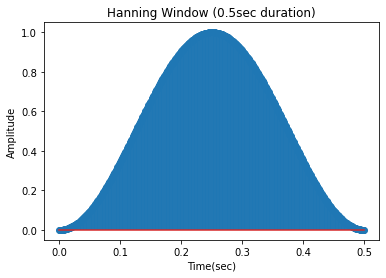

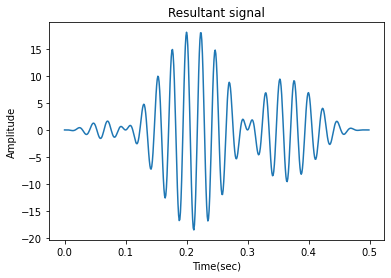

In [19]:
M1 = int(0.5*fs)
M1_half= (int)(M1/2)
Han1 = np.zeros(M1)
for i in range(0,M1):
    Han1[i] = 0.5 + 0.5*np.cos(np.pi*(i+M1_half)/M1_half)
    
n = np.arange(0,M1)
plt.stem(n/fs,Han1)
plt.title('Hanning Window (0.5sec duration)')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

#Multiplication of input signal with Hanning window of 0.5sec duration
Z1= np.zeros(len(Han1))
for i in range(0,len(Han1)):
    Z1[i] = Han1[i]*sgnl[i]
ind = np.arange(Z1.size) #index initialization
t=ind*(1/fs) #Convert no of samples into time
plt.plot(t,Z1)
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Resultant signal')
plt.show()

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


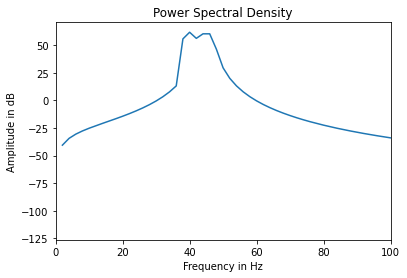

In [20]:
#PSD for when the signal multiplied with 0.5sec duration hanning window
F1= fftpack.fft(Z1)
freqs= fftpack.fftfreq(len(Z1))
freqs= freqs*fs
mask= freqs>0 
PSD1= (F1)*(F1)
PSD1= (10*np.log10(PSD1))
plt.plot(freqs[mask], PSD1[mask])
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Power Spectral Density')
plt.xlim(0,100)
plt.show()